In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,NaN,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
data.isna().sum()

sepal_length    4
sepal_width     4
petal_length    5
petal_width     2
species         0
dtype: int64

In [ ]:
target_column = data.columns[-1]
target_column

'species'

In [ ]:
feature_columns = data.columns[:-1]
feature_columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [ ]:
imputer = SimpleImputer(strategy='mean')
data[feature_columns] = imputer.fit_transform(data[feature_columns])
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.100000,3.5,1.400000,0.2,setosa
1,4.900000,3.0,1.400000,0.2,setosa
2,4.700000,3.2,1.300000,0.2,setosa
3,4.600000,3.1,1.500000,0.2,setosa
4,5.000000,3.6,1.400000,0.2,setosa
...,...,...,...,...,...
145,6.700000,3.0,5.200000,2.3,virginica
146,5.844521,2.5,5.000000,1.9,virginica
147,6.500000,3.0,5.200000,2.0,virginica
148,6.200000,3.4,5.400000,2.3,virginica


In [ ]:
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(data[[target_column]])
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(data[feature_columns])
X

array([[-0.90885066,  1.07763964, -1.40730311, -1.3464961 ],
       [-1.15299453, -0.10178605, -1.40730311, -1.3464961 ],
       [-1.3971384 ,  0.36998423, -1.465639  , -1.3464961 ],
       [-1.51921034,  0.13409909, -1.34896722, -1.3464961 ],
       [-1.03092259,  1.31352478, -1.40730311, -1.3464961 ],
       [-0.54263484,  2.0211802 , -1.23229543, -1.08043279],
       [-1.51921034,  0.8417545 , -1.40730311, -1.21346444],
       [-1.03092259,  0.8417545 ,  0.        , -1.3464961 ],
       [-1.76335422, -0.33767119, -1.40730311, -1.3464961 ],
       [-1.15299453,  0.13409909, -1.34896722, -1.47952776],
       [-0.54263484,  1.54940992, -1.34896722, -1.3464961 ],
       [ 0.        ,  0.8417545 , -1.29063133, -1.3464961 ],
       [-1.27506647, -0.10178605, -1.40730311, -1.47952776],
       [-1.88542615, -0.10178605, -1.58231079, -1.47952776],
       [-0.0543471 ,  2.25706534, -1.52397489, -1.3464961 ],
       [-0.17641903,  3.2006059 , -1.34896722, -1.08043279],
       [-0.54263484,  0.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print('X train shape is: ',X_train.shape)
print('X test shape is: ',X_test.shape)
print('Y train shape is: ',y_train.shape)
print('Y test shape is: ',y_test.shape)

X train shape is:  (120, 4)
X test shape is:  (30, 4)
Y train shape is:  (120, 3)
Y test shape is:  (30, 3)


In [ ]:
classifier = RandomForestClassifier(n_estimators=100,max_depth=2,random_state=33)
classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=33)

In [ ]:
y_pred = classifier.predict(X_test)
y_pred

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [ ]:
ClassificationReport = classification_report(y_test,y_pred)
print("Classification Report is : \n",ClassificationReport)

Classification Report is : 
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.82      1.00      0.90         9
           2       1.00      1.00      1.00        11

   micro avg       0.93      0.93      0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.95      0.93      0.93        30
 samples avg       0.93      0.93      0.93        30



In [ ]:
conf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
accuracy = accuracy_score(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print("\nConfusion Matrix:")
print(conf_matrix)
print("Accuracy:", accuracy)


Confusion Matrix:
[[ 8  2  0]
 [ 0  9  0]
 [ 0  0 11]]
Accuracy: 0.9333333333333333


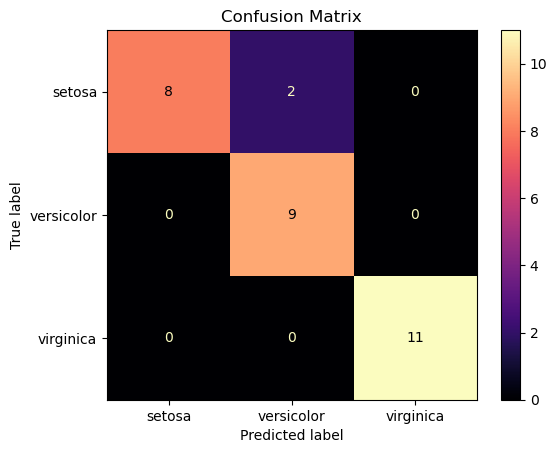

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=encoder.categories_[0])
disp.plot(cmap="magma")
plt.title('Confusion Matrix')
plt.show()

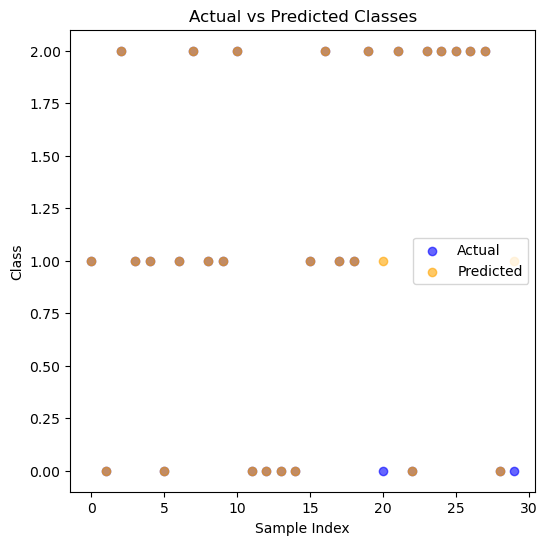

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(range(len(y_test)), y_test.argmax(axis=1), label='Actual', alpha=0.6, color='blue')
plt.scatter(range(len(y_pred)), y_pred.argmax(axis=1), label='Predicted', alpha=0.6, color='orange')
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.title('Actual vs Predicted Classes')
plt.legend()
plt.show()

In [ ]:
new_data = [[5.1, 3.5, 1.4, 0.2]]
new_data_df = pd.DataFrame(new_data, columns=feature_columns)
new_data_scaled = scaler.transform(new_data_df)
new_prediction = classifier.predict(new_data_scaled)
predicted_class_index = new_prediction.argmax(axis=1)[0]
predicted_class = encoder.categories_[0][predicted_class_index]
print("\nPredicted Class for the unseen sample:", predicted_class)


Predicted Class for the unseen sample: setosa
